# SVMs

# Clustering

# Semi-Supervised Learning

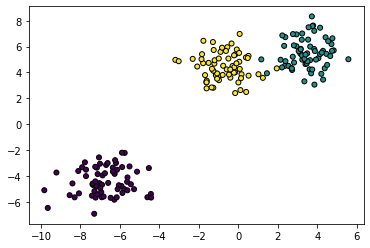

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k') #c=Y changes color based on label
plt.show()

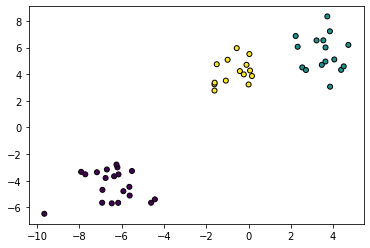

In [10]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

model = svm.SVC(gamma="scale") # Support Vector Classifier = Support Vector Machine
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=predictions, s=25, edgecolor='k')
plt.show()


# Assignment: 
1. Generate a plot of time vs. number of training points for a Support Vector Classifier
2. Generate a plot of performance vs. number of training points for a Support Vector Classifier
3. Evaluate the accuracy (Cluster Purity) of [k-means](https://scikit-learn.org/stable/modules/clustering.html#k-means) on any the blobs dataset.
4. After running k-means, randomly select a point from each cluster provide its label. What average accuracy does this produce? (This can be computed analytically if we know all of the labels.)

# Stretch Goals:
- Run all of the above steps with the Fish Dataset from yesterday.
- Evaluate the accuracy (Cluster Purity) of any [clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#clustering) on any [sklearn dataset](https://scikit-learn.org/stable/datasets/index.html)
- Consider: What can we do for inputs (e.g. images) where we don't have a good distance metric?

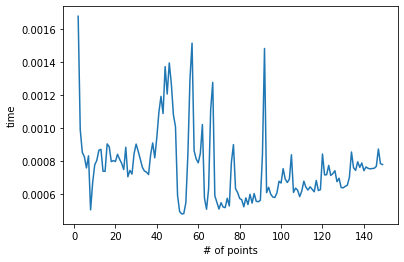

In [11]:
import time
npts = X_train.shape[0]
duration = []

for n in range(2,npts):
    start = time.time()
    svc = svm.SVC(gamma="scale").fit(X_train[:n,:], Y_train[:n])
    end = time.time()
    duration.append(end - start)
    
fig, ax = plt.subplots()
_ = ax.plot(range(2,npts), duration)
_ = ax.set(xlabel='# of points', ylabel='time')

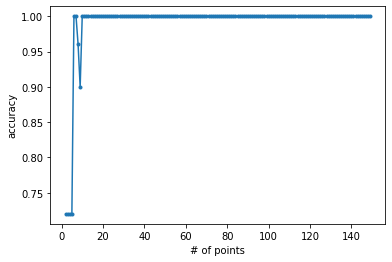

In [12]:
accuracy = []

for n in range(2,npts):
    svc = svm.SVC(gamma="scale").fit(X_train[:n,:], Y_train[:n])
    accuracy.append(svc.score(X_test, Y_test))

fig, ax = plt.subplots()
_ = ax.plot(range(2,npts), accuracy, '.-')
_ = ax.set(xlabel='# of points', ylabel='accuracy')

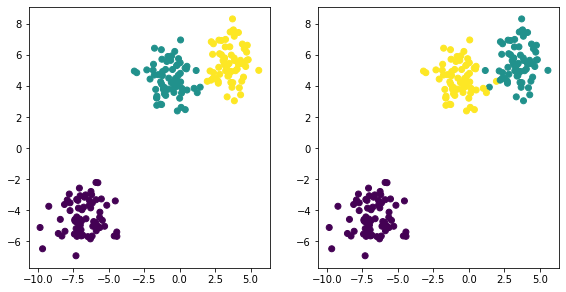

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)
yhat = km.predict(X)
fig, axs = plt.subplots(1,2,figsize=(9.5,4.8))
_ = axs[0].scatter(X[:,0], X[:,1], c=yhat)
_ = axs[1].scatter(X[:,0], X[:,1], c=Y)

In [14]:
for l in set(km.labels_):
    obs = len(Y[km.labels_==l])
    mod = len(yhat[km.labels_==l])
    print('obs: {}, model: {}, obs/model: {}'.format(obs, mod, obs/mod))

obs: 67, model: 67, obs/model: 1.0
obs: 67, model: 67, obs/model: 1.0
obs: 66, model: 66, obs/model: 1.0


In [15]:
for l in set(km.labels_):
    x = X[km.labels_==l,:]
    y = Y[km.labels_==l]
    i = np.random.randint(0,len(x),1).item()
    with np.printoptions(precision=6):
        print(x[i,:], y[i])

[-7.172291 -4.808707] 0
[-1.838386  5.412883] 2
[4.657024 5.266704] 1


In [16]:
import pandas as pd

df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


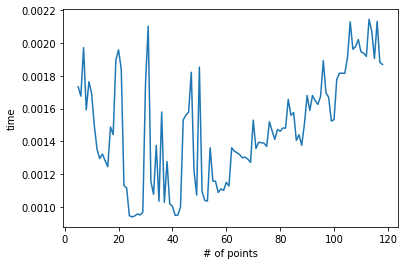

In [26]:
X = df[['Weight','Length1','Length2','Length3','Height','Width']].values
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y)
# svc = svm.SVC(gamma="scale").fit(X_train, y_train)

npts = len(X_train)
duration = []

for n in range(5,npts):
    start = time.time()
    svc = svm.SVC(gamma="scale").fit(X_train[:n,:], y_train[:n])
    end = time.time()
    duration.append(end - start)
    
fig, ax = plt.subplots()
_ = ax.plot(range(5,npts), duration)
_ = ax.set(xlabel='# of points', ylabel='time')